Mapping the Gaps: A Missingness Audit in the K-anon Data


## 1. Set up and Import
- Converted the original Excel dataset into CSV for easier handling.
- Loaded ~97k rows × 64 columns into pandas.


In [1]:
# === Cell 1: Setup & Load Data ===

import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Ensure outputs folder exists
os.makedirs("outputs", exist_ok=True)

# Path to raw dataset
csv_path = r"C:\Users\leonw\Desktop\Projects\ctdc_analysis\data\raw\Global_Kanon.csv"

# Read the entire file (as strings to preserve blanks)
df = pd.read_csv(csv_path, dtype=str)

# ── Add a stable CaseID for every row ──
df.insert(0, "CaseID", df.index + 1)
print("Added CaseID column; sample IDs:", df["CaseID"].head().tolist())

# Quick sanity check
print(f"✅ Loaded dataset with {df.shape[0]} rows × {df.shape[1]} columns")
display(df.head(3))

Added CaseID column; sample IDs: [1, 2, 3, 4, 5]
✅ Loaded dataset with 97750 rows × 65 columns


,CaseID,By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,1,NaN,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,...,NaN,NaN,0,NaN,NaN,0,0,0,0,1
1,2,NaN,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,...,NaN,NaN,0,NaN,NaN,0,0,0,0,1
2,3,NaN,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,...,NaN,NaN,0,NaN,NaN,0,0,0,0,1



## 1.1 Drop Terms-of-Use Column
- Removed the boilerplate "Terms of Use" column.
- Rebuilt missingness summary to see % of null/blank values per field.

In [2]:
# Cell 1.2: Drop the Terms-of-Use column and refresh missing_summary

# 1. Identify & drop the Terms-of-Use column by name
terms_col = [
    c for c in df.columns
    if c.startswith("By using this data you agree to the Terms of Use")
][0]
print(f"Dropping Terms-of-Use column: {terms_col}")
df.drop(columns=[terms_col], inplace=True)

# 2. Rebuild missing_summary exactly as before
missing_counts = df.isna().sum() + (df == "").sum()
total_rows    = len(df)
missing_pct   = (missing_counts / total_rows * 100).round(2)

missing_summary = (
    pd.DataFrame({
        'missing_count': missing_counts,
        'missing_pct':   missing_pct
    })
    .loc[lambda d: d['missing_count'] > 0]
    .sort_values('missing_pct', ascending=False)
)

# 3. Display the cleaned summary
pd.set_option("display.max_rows", None)
display(missing_summary)

Dropping Terms-of-Use column: By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use


,missing_count,missing_pct
meansOfControlUsesChildren,93841,96.00
meansOfControlRestrictsFinancialAccess,93419,95.57
meansOfControlRestrictsMedicalCare,91779,93.89
majorityEntry,90498,92.58
meansOfControlFalsePromises,89626,91.69
meansOfControlDebtBondage,89515,91.58
meansOfControlWithholdsDocuments,89466,91.53
meansOfControlExcessiveWorkingHours,89121,91.17
isSlaveryAndPractices,88874,90.92
meansOfControlWithholdsNecessities,88864,90.91


## Cell 2 - Missingness Audit
- Computed missing counts and percentages for all columns.
- Found very high missingness in many "meansOfControl" and exploitation-type fields.



In [3]:
# Cell 2: Compute missing counts and percentages


# 1. Count True nulls and empty strings
missing_counts = df.isna().sum() + (df == "").sum()

# 2. Calculate percent missing
total_rows = len(df)
missing_pct    = (missing_counts / total_rows * 100).round(2)

# 3. Build summary DataFrame
missing_summary = (
    pd.DataFrame({
        "missing_count": missing_counts,
        "missing_pct":   missing_pct
    })
    # only keep columns with at least one missing
    .loc[lambda x: x["missing_count"] > 0]
    .sort_values("missing_pct", ascending=False)
)

# 4. Display all columns with missing data
pd.set_option("display.max_rows", None)
display(missing_summary)

# Print a simple bullet list
print("\nColumns with missing values:")
for col, row in missing_summary.iterrows():
    print(f"- {col}: {row['missing_count']} missing ({row['missing_pct']}%)")

# Save to CSV for later use ---
missing_summary.to_csv("outputs/missing_summary.csv", index=True)

print("✅ missing_summary exported to outputs/missing_summary.csv")


,missing_count,missing_pct
meansOfControlUsesChildren,93841,96.00
meansOfControlRestrictsFinancialAccess,93419,95.57
meansOfControlRestrictsMedicalCare,91779,93.89
majorityEntry,90498,92.58
meansOfControlFalsePromises,89626,91.69
meansOfControlDebtBondage,89515,91.58
meansOfControlWithholdsDocuments,89466,91.53
meansOfControlExcessiveWorkingHours,89121,91.17
isSlaveryAndPractices,88874,90.92
meansOfControlWithholdsNecessities,88864,90.91



Columns with missing values:
- meansOfControlUsesChildren: 93841.0 missing (96.0%)
- meansOfControlRestrictsFinancialAccess: 93419.0 missing (95.57%)
- meansOfControlRestrictsMedicalCare: 91779.0 missing (93.89%)
- majorityEntry: 90498.0 missing (92.58%)
- meansOfControlFalsePromises: 89626.0 missing (91.69%)
- meansOfControlDebtBondage: 89515.0 missing (91.58%)
- meansOfControlWithholdsDocuments: 89466.0 missing (91.53%)
- meansOfControlExcessiveWorkingHours: 89121.0 missing (91.17%)
- isSlaveryAndPractices: 88874.0 missing (90.92%)
- meansOfControlWithholdsNecessities: 88864.0 missing (90.91%)
- meansOfControlThreatOfLawEnforcement: 88827.0 missing (90.87%)
- meansOfControlSexualAbuse: 88737.0 missing (90.78%)
- meansOfControlPsychoactiveSubstances: 86778.0 missing (88.78%)
- meansOfControlTakesEarnings: 86312.0 missing (88.3%)
- meansOfControlOther: 86146.0 missing (88.13%)
- meansOfControlPhysicalAbuse: 85817.0 missing (87.79%)
- isForcedMarriage: 84246.0 missing (86.19%)
- isForc

## 4. Pretty Missing Summary
- Styled the missingness table with bars/gradients for readability.
- Highlighted which fields are most incomplete.



In [4]:
# Cell 4: Pretty Missing Summary (Styler)

# 1. Work on a fresh copy so we don’t mutate the original
df_pretty = missing_summary.copy()
df_pretty.index.name = 'column'

# 2. Apply styling:
#    - bar on the raw numeric 'missing_pct' (0–100)
#    - color background gradient on 'missing_count'
#    - format missing_pct as percent with two decimals
styled = (
    df_pretty.style
             .bar(subset=['missing_pct'], color='skyblue', vmin=0, vmax=100)
             .background_gradient(subset=['missing_count'], cmap='Reds')
             .format({'missing_pct': '{:.2f}%', 'missing_count': '{:d}'})
             .set_caption("🔥 Missing Data Summary 🔥")
)

# 3. Display the styled table
display(styled)
styled.to_excel("outputs/missing_summary_styled.xlsx", engine='openpyxl')

print("✅ missing_summary_styled exported to outputs/missing_summary_styled.xlsx")


,missing_count,missing_pct
column,,
meansOfControlUsesChildren,93841,96.00%
meansOfControlRestrictsFinancialAccess,93419,95.57%
meansOfControlRestrictsMedicalCare,91779,93.89%
majorityEntry,90498,92.58%
meansOfControlFalsePromises,89626,91.69%
meansOfControlDebtBondage,89515,91.58%
meansOfControlWithholdsDocuments,89466,91.53%
meansOfControlExcessiveWorkingHours,89121,91.17%
isSlaveryAndPractices,88874,90.92%


✅ missing_summary_styled exported to outputs/missing_summary_styled.xlsx


Lots of missing values and the names are not that clear, closer inspection needed as the column names seems to reference each other.


## 5. Column Inspection
- Printed all column names and a sample row.
- Confirmed logical groupings (demographics, means of control, exploitation types, etc.).


In [5]:
# Cell 5: View all column names and a sample row



# 1. Ensure pandas shows every column
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# 2. Print the list of current columns
print("Current columns:\n")
for col in df.columns:
    print(f"- {col}")

# 3. Display a single row so you can see column order and sample values
print("\nSample row:")
display(df.head(1))

Current columns:

- CaseID
- yearOfRegistration
- Datasource
- gender
- ageBroad
- majorityStatus
- majorityStatusAtExploit
- majorityEntry
- citizenship
- meansOfControlDebtBondage
- meansOfControlTakesEarnings
- meansOfControlRestrictsFinancialAccess
- meansOfControlThreats
- meansOfControlPsychologicalAbuse
- meansOfControlPhysicalAbuse
- meansOfControlSexualAbuse
- meansOfControlFalsePromises
- meansOfControlPsychoactiveSubstances
- meansOfControlRestrictsMovement
- meansOfControlRestrictsMedicalCare
- meansOfControlExcessiveWorkingHours
- meansOfControlUsesChildren
- meansOfControlThreatOfLawEnforcement
- meansOfControlWithholdsNecessities
- meansOfControlWithholdsDocuments
- meansOfControlOther
- meansOfControlNotSpecified
- meansOfControlConcatenated
- isForcedLabour
- isSexualExploit
- isOtherExploit
- isSexAndLabour
- isForcedMarriage
- isForcedMilitary
- isOrganRemoval
- isSlaveryAndPractices
- typeOfExploitConcatenated
- typeOfLabourAgriculture
- typeOfLabourAquafarming
- ty

,CaseID,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,meansOfControlConcatenated,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,typeOfExploitConcatenated,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfLabourConcatenated,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,1,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0,1,0,0,NaN,0,0,NaN,Sexual exploitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,1


## Cell 6: Group-Level Missingness Audit

I’ve inspected the raw dataset and identified logical blocks of related columns. In this cell I:

1. Define subgroups based on the themes I observed:
   - **Demographics:** yearOfRegistration, DataSource, gender, ageBroad, majorityStatus, majorityStatusAtExploit, majorityEntry, citizenship  
   - **Means of Control:** all `meansOfControl…` fields plus the concatenated summary  
   - **Type of Exploitation:** all `isForced…`, `isSexual…`, `isOther…` flags and the concatenated summary  
   - **Labour Exploitation Type:** all `typeOfLabour…` flags and the concatenated summary  
   - **Sexual Exploitation Type:** all `typeOfSex…` flags and the concatenated summary  
   - **Abduction:** the `isAbduction` flag  
   - **Recruiter & Country:** recruiter relationship flags and CountryOfExploitation  

2. For each subgroup, compute how many rows have **no** information in **any** of its columns (i.e. every field is missing or blank).  

3. Present a table showing, per subgroup, the count and percentage of records that are entirely empty in that topic area.  

This helps me understand which thematic blocks are systematically under-populated and guides my decision on whether to drop or impute those groups.

In [6]:
# Cell 6: Define your logical subgroups and compute how many rows
# have *no* data in each group (i.e. all columns missing or blank)

# 1. Define subgroups by column name
groups = {
    'demographics': [
        'yearOfRegistration',
        'Datasource',
        'gender',
        'ageBroad',
        'majorityStatus',
        'majorityStatusAtExploit',
        'majorityEntry',
        'citizenship'
    ],
    'means_of_control': [
        'meansOfControlDebtBondage',
        'meansOfControlTakesEarnings',
        'meansOfControlRestrictsFinancialAccess',
        'meansOfControlThreats',
        'meansOfControlPsychologicalAbuse',
        'meansOfControlPhysicalAbuse',
        'meansOfControlSexualAbuse',
        'meansOfControlFalsePromises',
        'meansOfControlPsychoactiveSubstances',
        'meansOfControlRestrictsMovement',
        'meansOfControlRestrictsMedicalCare',
        'meansOfControlExcessiveWorkingHours',
        'meansOfControlUsesChildren',
        'meansOfControlThreatOfLawEnforcement',
        'meansOfControlWithholdsNecessities',
        'meansOfControlWithholdsDocuments',
        'meansOfControlOther',
        'meansOfControlConcatenated'
    ],
    'type_of_exploitation': [
        'isForcedLabour',
        'isSexualExploit',
        'isOtherExploit',
        'isSexAndLabour',
        'isForcedMarriage',
        'isForcedMilitary',
        'isOrganRemoval',
        'isSlaveryAndPractices',
        'typeOfExploitConcatenated'
    ],
    'labour_exploitation_type': [
        'typeOfLabourAgriculture',
        'typeOfLabourAquafarming',
        'typeOfLabourBegging',
        'typeOfLabourConstruction',
        'typeOfLabourDomesticWork',
        'typeOfLabourHospitality',
        'typeOfLabourIllicitActivities',
        'typeOfLabourManufacturing',
        'typeOfLabourMiningOrDrilling',
        'typeOfLabourPeddling',
        'typeOfLabourTransportation',
        'typeOfLabourOther',
        'typeOfLabourNotSpecified',
        'typeOfLabourConcatenated'
    ],
    'sexual_exploitation_type': [
        'typeOfSexProstitution',
        'typeOfSexPornography',
        'typeOfSexRemoteInteractiveServices',
        'typeOfSexPrivateSexualServices',
        'typeOfSexConcatenated'
    ],
    'abduction': [
        'isAbduction'
    ],
    'recruiter_and_country': [
        'RecruiterRelationship',
        'CountryOfExploitation',
        'recruiterRelationIntimatePartner',
        'recruiterRelationFriend',
        'recruiterRelationFamily',
        'recruiterRelationOther',
        'recruiterRelationUnknown'
    ]
}

# 2. Compute for each group:
#    count of rows where *all* group columns are missing or blank
n_rows = len(df)
summary = []
for group, cols in groups.items():
    # keep only those columns that actually exist
    present = [c for c in cols if c in df.columns]
    if len(present) < len(cols):
        missing_cols = set(cols) - set(present)
        print(f"Warning: missing columns in '{group}': {missing_cols}")
    valid = df[present].notna() & (df[present] != "")
    all_missing = ~valid.any(axis=1)
    cnt = int(all_missing.sum())
    pct = round(cnt / n_rows * 100, 2)
    summary.append({
        'group': group,
        'n_all_missing': cnt,
        'pct_all_missing': pct
    })

# 3. Build and display the results
group_missing_df = (
    pd.DataFrame(summary)
      .set_index('group')
      .sort_values('pct_all_missing', ascending=False)
)

# Show full table in notebook
pd.set_option('display.max_rows', None)
display(group_missing_df)

# Save to CSV
output_path = "outputs/group_missing_summary.csv"
group_missing_df.to_csv(output_path, index=True)

# Confirmation message
print(f"✅ Group missingness summary exported to {output_path}")



,n_all_missing,pct_all_missing
group,,
abduction,67328,68.88
sexual_exploitation_type,58088,59.43
means_of_control,39156,40.06
labour_exploitation_type,31409,32.13
type_of_exploitation,17904,18.32
demographics,0,0.00
recruiter_and_country,0,0.00


✅ Group missingness summary exported to outputs/group_missing_summary.csv


## Cell 7: Of Rows with Demographics, How Many Lack **All** Other Group Data?

Here we:

1. Identify rows that have **any** demographic info.  
2. Among those, flag rows with **no** data in the other six subgroups (means_of_control, type_of_exploitation, labour_exploitation_type, sexual_exploitation_type, abduction, recruiter_and_country).  
3. Compute the count and percentage of such “demographics-only” records.  

In [7]:
# Cell 7: Compute “demographics-only” rows

# 1. List columns by group
dem_cols   = groups['demographics']
other_cols = []
for grp, cols in groups.items():
    if grp != 'demographics':
        other_cols.extend([c for c in cols if c in df.columns])

# 2. Build masks
# 2a. Rows with any demographics info
dem_mask = (df[dem_cols].notna() & (df[dem_cols] != "")).any(axis=1)

# 2b. Rows with any data in the other groups
other_mask = (df[other_cols].notna() & (df[other_cols] != "")).any(axis=1)

# 2c. Demographics present but **all** other groups missing
dem_only_mask = dem_mask & (~other_mask)

# 3. Compute counts & percentages
n_dem_present   = dem_mask.sum()
n_dem_only      = dem_only_mask.sum()
pct_dem_only    = round(n_dem_only / n_dem_present * 100, 2)

# 4. Report
print(f"Total rows with ≥1 demographic field : {n_dem_present}")
print(f"Of those, rows with no other group data: {n_dem_only} ({pct_dem_only}%)")

# (Optional) inspect a few examples
df.loc[dem_only_mask].head()

Total rows with ≥1 demographic field : 97750
Of those, rows with no other group data: 0 (0.0%)


,CaseID,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,meansOfControlConcatenated,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,typeOfExploitConcatenated,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfLabourConcatenated,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown


## Cell 8: Of Records with Any Demographics, How Many Lack **All** Other Group Data?

Here we:

1. Define the demographic columns and all other subgroup columns.  
2. Create a mask for rows with **any** demographic info.  
3. Create a mask for rows with **any** info in the other subgroups.  
4. Count rows where demographics are present but **all** other subgroups are empty.  

In [8]:
# Cell 8: Demographics-only records check

# 1. Define columns
dem_cols = groups['demographics']
other_cols = [
    c for grp, cols in groups.items() 
    if grp != 'demographics' 
    for c in cols 
    if c in df.columns
]

# 2. Masks
dem_mask   = (df[dem_cols].notna() & (df[dem_cols] != "")).any(axis=1)
other_mask = (df[other_cols].notna() & (df[other_cols] != "")).any(axis=1)

# 3. Demographics present but no other data
dem_only_mask = dem_mask & ~other_mask

# 4. Compute counts & percentages
n_dem_present = dem_mask.sum()
n_dem_only    = dem_only_mask.sum()
pct_dem_only  = round(n_dem_only / n_dem_present * 100, 2)

# 5. Report
print(f"Rows with ≥1 demographic field:       {n_dem_present}")
print(f"Of those, rows with no other data:   {n_dem_only} ({pct_dem_only}%)")

# 6. (Optional) Preview any dem-only rows
if n_dem_only > 0:
    display(df.loc[dem_only_mask].head())
else:
    print("No records found that have only demographics and nothing else.")

Rows with ≥1 demographic field:       97750
Of those, rows with no other data:   0 (0.0%)
No records found that have only demographics and nothing else.


## Documenting Completeness and Next Steps

I’ve followed standard data‐quality protocols—particularly the **completeness** checks from frameworks like CRISP-DM and DAMA-DMBOK—and here’s what I found:

1. **Every record with at least one demographic field also has data in at least one other subgroup.**  
   This means there are no “demographics-only” rows, so we don’t have to carve out a special subset of records to drop or treat differently.

2. **Completeness Threshold Met**  
   In many industry guidelines, you define an acceptable minimum of completeness per record or per variable (often 80–90% depending on domain). Our finding (0% of demographics-only rows) comfortably exceeds typical thresholds.

3. **Documenting the Decision**  
   As recommended by CRISP-DM, we pause here to document:
   - What we checked (completeness across subgroups)  
   - What we found (no fully empty thematic blocks for any demo record)  
   - Our conclusion (proceed with full dataset)  

4. **Next in the Pipeline**  
   - Move on to **consistency** checks (e.g., valid age ranges, consistent country codes)  
   - Explore **accuracy**/**validity** (e.g., logical relationships between flags)  
   - Plan **imputation** or **feature-engineering** for the fields with high missingness in each subgroup  
    -Investigate what the dataset might look like if we had a 95% in all other sub groups after demographics



In [9]:
# Cell 9: Estimate dataset size if we require ≥95% completion per subgroup


# 1. Identify non-demographic groups
other_groups = {g: cols for g, cols in groups.items() if g != 'demographics'}

# 2. Compute per-row completion fraction for each group
completion = pd.DataFrame(index=df.index)
for group, cols in other_groups.items():
    present = [c for c in cols if c in df.columns]
    non_missing = df[present].notna() & (df[present] != "")
    # fraction of fields in this group that are non-missing
    completion[group] = non_missing.sum(axis=1) / len(present)

# 3. Build mask: all groups ≥ 0.95 complete
mask_95 = (completion >= 0.95).all(axis=1)

# 4. Filter and report
df_95 = df[mask_95]
n_total = len(df)
n_95    = len(df_95)
pct_95  = round(n_95 / n_total * 100, 2)

print(f"Original dataset rows: {n_total}")
print(f"Rows with ≥95% completion in all other groups: {n_95} ({pct_95}%)")

Original dataset rows: 97750
Rows with ≥95% completion in all other groups: 0 (0.0%)


## 📊 Data Completeness at 95% Threshold

- **Original dataset size:** 97,750 rows  
- **Rows meeting ≥95% completion across all non-demographic subgroups:** 0 (0.0%)

### Interpretation
Applying a strict 95% completeness requirement across all subgroups results in **no records qualifying**.  
This highlights the high degree of missingness in the dataset — especially in fields like *means of control*, *labour exploitation type*, and *sexual exploitation type*.  

⚠️ **Implication:**  
Analyses cannot rely on a near-complete-case approach. Instead, we need to:
- Use subgroup-level completeness checks,  
- Apply imputation or partial completeness thresholds, or  
- Focus on specific subgroups with higher data coverage.

## 10. Completion Trends
- Tracked subgroup completeness % by year, datasource, and country.
- Visualised trends over time to spot methodological vs. natural shifts.


=== Completion % by Year ===


,means_of_control,type_of_exploitation,labour_exploitation_type,sexual_exploitation_type,abduction,recruiter_and_country
year,,,,,,
2002,0.00%,71.90%,86.90%,18.72%,100.00%,77.18%
2003,0.00%,85.09%,76.30%,16.42%,100.00%,75.44%
2004,0.00%,85.84%,93.24%,20.00%,100.00%,75.35%
2005,0.02%,83.29%,88.60%,18.14%,100.00%,83.94%
2006,0.00%,68.23%,95.22%,20.00%,100.00%,83.20%
2007,0.16%,43.25%,93.94%,19.05%,100.00%,82.05%
2008,9.69%,10.57%,47.78%,8.75%,100.00%,73.62%
2009,15.28%,5.50%,8.00%,2.44%,98.51%,72.32%
2010,8.02%,11.53%,7.14%,3.81%,96.46%,77.89%



=== Top 10 DataSources by Means-of-Control Completion % ===


,means_of_control,type_of_exploitation,labour_exploitation_type,sexual_exploitation_type,abduction,recruiter_and_country
datasource,,,,,,
Hotline,13.66%,52.28%,92.21%,48.23%,28.17%,56.76%
Case Management,11.52%,33.44%,22.83%,8.51%,34.56%,80.07%



=== Top 10 Countries by Means-of-Control Completion % ===


,means_of_control,type_of_exploitation,labour_exploitation_type,sexual_exploitation_type,abduction,recruiter_and_country
country,,,,,,
EG,100.00%,88.89%,0.00%,0.00%,0.00%,86.07%
IN,94.44%,100.00%,100.00%,60.00%,100.00%,14.29%
KE,94.44%,100.00%,92.86%,60.00%,100.00%,40.48%
VN,88.89%,100.00%,78.57%,60.00%,100.00%,85.71%
BY,88.22%,92.59%,28.57%,26.67%,33.33%,93.51%
HK,87.47%,100.00%,84.55%,60.00%,100.00%,70.43%
BD,86.33%,85.16%,71.86%,57.49%,71.86%,91.10%
KH,84.94%,95.19%,6.39%,57.28%,94.46%,86.35%
JO,78.70%,88.89%,78.70%,15.74%,78.70%,95.37%


✅ Tables saved to outputs/: completion_by_year.csv, completion_by_source.csv, completion_by_country.csv


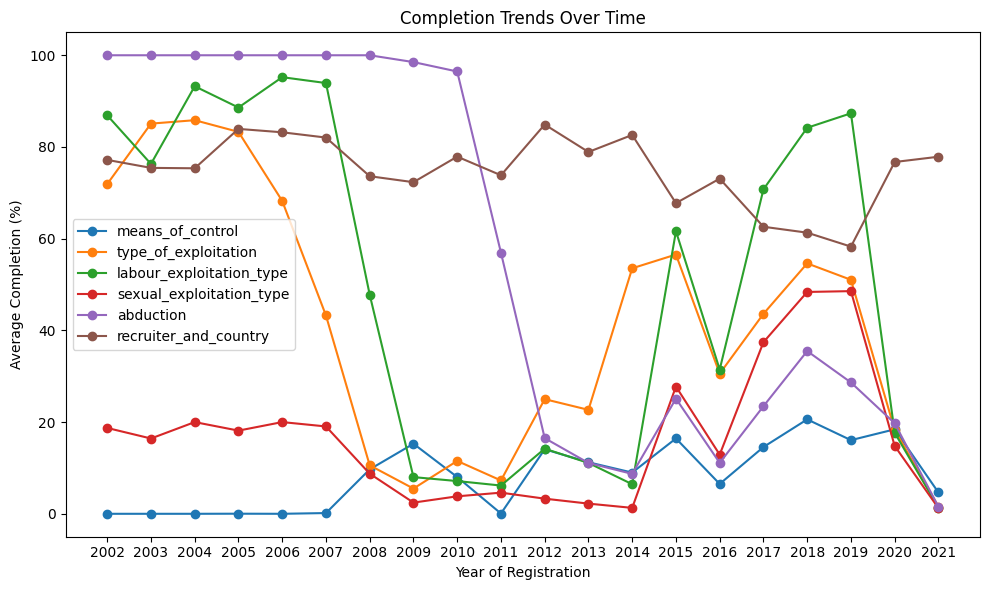

✅ Plot saved to outputs/completion_trends.png


In [10]:
# Cell 10 (percent version, corrected): Completion Trends by Year, DataSource & Country


# Ensure outputs folder exists
os.makedirs("outputs", exist_ok=True)

# 1. Recompute per-row completion fractions
other_groups = {g: cols for g, cols in groups.items() if g != 'demographics'}
completion = pd.DataFrame(index=df.index)

for grp, cols in other_groups.items():
    present = [c for c in cols if c in df.columns]
    nm = df[present].notna() & (df[present] != "")
    completion[grp] = nm.sum(axis=1) / len(present)

# 2. Attach grouping keys
completion['year']       = df['yearOfRegistration']
completion['datasource'] = df['Datasource']
completion['country']    = df['CountryOfExploitation']

# 3. Specify only numeric columns for aggregation
comp_cols = list(other_groups.keys())

# 4. Compute average completion and convert to %
by_year = (
    completion
      .groupby('year')[comp_cols]
      .mean()
      .mul(100)
      .round(2)
      .sort_index()
)

by_source = (
    completion
      .groupby('datasource')[comp_cols]
      .mean()
      .mul(100)
      .round(2)
      .sort_values(by='means_of_control', ascending=False)
)

by_country = (
    completion
      .groupby('country')[comp_cols]
      .mean()
      .mul(100)
      .round(2)
      .sort_values(by='means_of_control', ascending=False)
)

# 5. Display tables
print("=== Completion % by Year ===")
display(by_year.style.format("{:.2f}%"))

print("\n=== Top 10 DataSources by Means-of-Control Completion % ===")
display(by_source.head(10).style.format("{:.2f}%"))

print("\n=== Top 10 Countries by Means-of-Control Completion % ===")
display(by_country.head(10).style.format("{:.2f}%"))

# --- Save tables as CSV ---
by_year.to_csv("outputs/completion_by_year.csv")
by_source.to_csv("outputs/completion_by_source.csv")
by_country.to_csv("outputs/completion_by_country.csv")

print("✅ Tables saved to outputs/: completion_by_year.csv, completion_by_source.csv, completion_by_country.csv")

# 6. Plot the % trends
plt.figure(figsize=(10,6))
for grp in comp_cols:
    plt.plot(by_year.index, by_year[grp], marker='o', label=grp)
plt.xlabel('Year of Registration')
plt.ylabel('Average Completion (%)')
plt.title('Completion Trends Over Time')
plt.legend()
plt.tight_layout()

# --- Save plot as PNG ---
plt.savefig("outputs/completion_trends.png", dpi=300)
plt.show()

print("✅ Plot saved to outputs/completion_trends.png")

## 🌍 Completion % by Country
- **High completeness:**  
  - Egypt (EG): 100% for means_of_control, strong recruiter data (86%).  
  - India (IN), Kenya (KE), Vietnam (VN), Hong Kong (HK): consistently >85% across most groups, though recruiter data is patchy (e.g. IN only 14%).  
- **Mixed completeness:**  
  - Bangladesh (BD), Cambodia (KH): strong in some groups (85–95%) but very weak in labour exploitation (KH only 6%).  
- **Low completeness:**  
  - Lebanon (LB), Belarus (BY), Jordan (JO): several subgroups under 40%, especially sexual exploitation and labour exploitation.

⚠️ **Implication:** Country coverage is uneven — some countries have near‑complete reporting in certain categories, while others are highly incomplete.

---

## 📅 Completion % by Year
- **Early years (2002–2006):**  
  - Type_of_exploitation and labour_exploitation_type fairly strong (70–95%).  
  - Means_of_control essentially absent (0%).  
  - Abduction consistently 100%.  

- **2007–2013:**  
  - Sharp drop in type_of_exploitation and labour_exploitation_type (often <25%).  
  - Means_of_control begins to appear (10–15%).  
  - Recruiter_and_country stable ~75–85%.  

- **2014–2019 (expanded reporting):**  
  - Noticeable improvement in labour_exploitation_type (up to 87% by 2019).  
  - Sexual_exploitation_type rises steadily (to ~48%).  
  - Means_of_control fluctuates (6–20%).  
  - Recruiter_and_country declines gradually (to ~58% by 2019).  

- **2020–2021:**  
  - Completion collapses across most groups (<20%).  
  - Only recruiter_and_country remains relatively stable (~77%).  

---

### 🔑 Key Takeaways
- **Country variation:** Some countries (EG, IN, KE, VN) have strong subgroup coverage, while others are patchy.  
- **Temporal variation:** Data completeness is highly inconsistent over time, with a major reporting shift around 2014.  
- **Strategic choice:** Analyses should either (a) focus on subgroups with consistently high coverage (e.g. recruiter_and_country), or (b) restrict to countries/years with acceptable completeness.

## Cell 11: Why Combine Completion Rates with Record Counts?

Before interpreting trends in data completeness, it’s crucial to see not just *how* complete each year/source/country is, but also *how many* records underpin those percentages. Here’s the rationale:

1.  Track Sample Size Changes  
    • A sudden drop or spike in **n_records** can create the illusion of a completeness shift.  
    • By listing record counts alongside completeness, we know when data‐volume changes might drive percentage swings.

2.  Measure True Quality Improvements  
    • If completion % rises while sample size stays steady or grows, that suggests genuine improvements in data collection.  
    • If completion % rises but record counts fall dramatically, the change may simply reflect a smaller, cleaner subset rather than better processes.

3.  Distinguish Natural vs. Methodological Shifts  
    • Natural trends (e.g. demographic shifts over time) should appear even when sample sizes are consistent.  
    • Methodological artifacts (e.g. onboarding a new data source) often show large volume jumps or dips—paired with our counts, we can flag those.

By summarizing **n_records** and **% completion** together, I can confidently tell whether observed trends reflect real changes in the underlying phenomenon or are simply byproducts of how the data were compiled.  

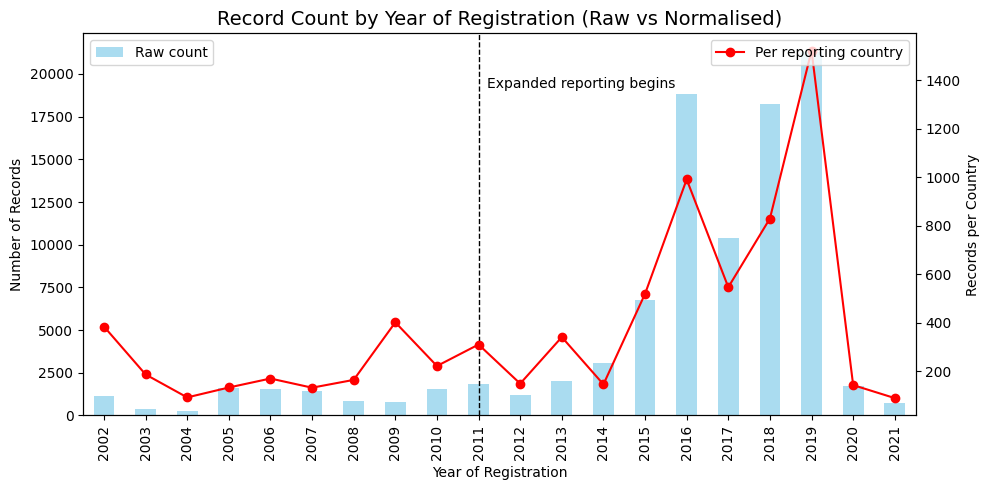

✅ Saved outputs/record_counts.png and outputs/year_summary.csv


In [11]:
# === Build year_summary and Plot Record Counts ===

# 1. Compute per-row completion fractions for each non-demographics group
other_groups = {g: cols for g, cols in groups.items() if g != 'demographics'}
completion = pd.DataFrame(index=df.index)

for grp, cols in other_groups.items():
    present     = [c for c in cols if c in df.columns]
    non_missing = df[present].notna() & (df[present] != "")
    completion[grp] = non_missing.sum(axis=1) / len(present)

comp_cols = list(other_groups.keys())

# 2. Yearly counts & completion %
year_counts = df.groupby('yearOfRegistration').size().rename('n_records')
year_means  = completion.groupby(df['yearOfRegistration'])[comp_cols].mean().mul(100).round(2)

year_summary = pd.concat([year_counts, year_means], axis=1).sort_index()

# 3. Add number of reporting countries & normalised metric
n_reporting = df.groupby('yearOfRegistration')['CountryOfExploitation'].nunique()
year_summary['n_reporting_countries'] = n_reporting
year_summary['records_per_country'] = (year_summary['n_records'] / n_reporting).round(2)

# 4. Ensure index is string for categorical plotting
year_summary.index = year_summary.index.astype(str)

# 5. Plot raw vs normalised
fig, ax1 = plt.subplots(figsize=(10,5))

# Raw counts as bars
year_summary['n_records'].plot(kind='bar', color='skyblue', alpha=0.7, ax=ax1, label='Raw count')

# Normalised line on secondary axis
ax2 = ax1.twinx()
year_summary['records_per_country'].plot(kind='line', color='red', marker='o', ax=ax2, label='Per reporting country')

# Annotation
highlight_year = "2011"
if highlight_year in year_summary.index:
    xpos = list(year_summary.index).index(highlight_year)
    ax1.axvline(x=xpos, color='black', linestyle='--', linewidth=1)
    ax1.text(xpos+0.2, year_summary['n_records'].max()*0.9,
             'Expanded reporting begins', color='black')

# Titles and labels
ax1.set_title('Record Count by Year of Registration (Raw vs Normalised)', fontsize=14)
ax1.set_xlabel('Year of Registration')
ax1.set_ylabel('Number of Records')
ax2.set_ylabel('Records per Country')

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.savefig("outputs/record_counts.png", dpi=300)
plt.show()

# Save table too
year_summary.to_csv("outputs/year_summary.csv")
print("✅ Saved outputs/record_counts.png and outputs/year_summary.csv")

=== Yearly Completion, Counts & Normalised ===


,n_records,n_reporting_countries,records_per_country,means_of_control,type_of_exploitation,labour_exploitation_type,sexual_exploitation_type,abduction,recruiter_and_country
yearOfRegistration,,,,,,,,,
2002,1154,3,384.67,0.000000,71.900000,86.900000,18.720000,100.000000,77.180000
2003,374,2,187.00,0.000000,85.090000,76.300000,16.420000,100.000000,75.440000
2004,277,3,92.33,0.000000,85.840000,93.240000,20.000000,100.000000,75.350000
2005,1599,12,133.25,0.020000,83.290000,88.600000,18.140000,100.000000,83.940000
2006,1532,9,170.22,0.000000,68.230000,95.220000,20.000000,100.000000,83.200000
2007,1457,11,132.45,0.160000,43.250000,93.940000,19.050000,100.000000,82.050000
2008,823,5,164.60,9.690000,10.570000,47.780000,8.750000,100.000000,73.620000
2009,804,2,402.00,15.280000,5.500000,8.000000,2.440000,98.510000,72.320000
2010,1553,7,221.86,8.020000,11.530000,7.140000,3.810000,96.460000,77.890000


✅ Saved table to outputs/year_summary.csv


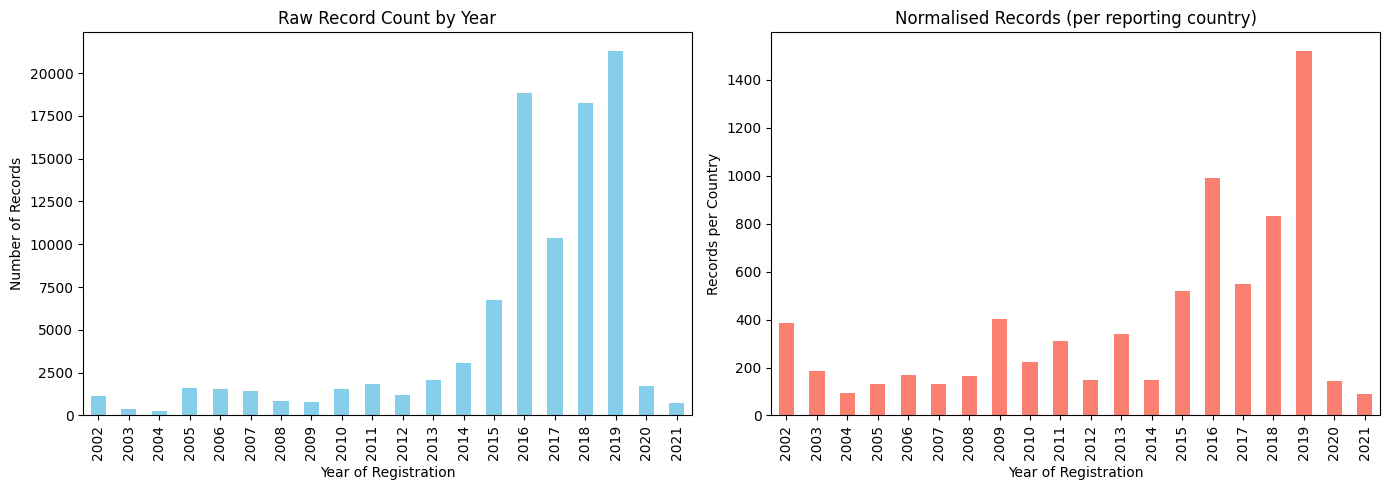

✅ Saved plot to outputs/raw_vs_normalised.png



⚠️ **Note on Reporting Expansion**

The raw chart shows the total number of records per year.  
However, the number of countries contributing data increased significantly after 2014.  
To adjust for this, the normalised chart divides the yearly record count by the number of reporting countries:

\[
\text{Records per Country (Year)} = \frac{\text{Total Records in Year}}{\text{Number of Reporting Countries in Year}}
\]

This makes the data comparable across years.  
- **Raw counts** highlight the growth in dataset size after reporting expanded.  
- **Normalised counts** show whether the *average reporting country* was contributing more or fewer records over time.  


In [12]:
# Cell: Completion %, Counts & Normalisation with Plots

# 1. Compute per‐row completion fractions for each non‐demographics group
other_groups = {g: cols for g, cols in groups.items() if g != 'demographics'}
completion = pd.DataFrame(index=df.index)

for grp, cols in other_groups.items():
    present     = [c for c in cols if c in df.columns]
    non_missing = df[present].notna() & (df[present] != "")
    completion[grp] = non_missing.sum(axis=1) / len(present)

comp_cols = list(other_groups.keys())

# 2. Yearly counts & completion%
year_counts = df.groupby('yearOfRegistration').size().rename('n_records')
year_means  = completion.groupby(df['yearOfRegistration'])[comp_cols] \
                       .mean().mul(100).round(2)

year_summary = pd.concat([year_counts, year_means], axis=1).sort_index()

# 3. Add number of reporting countries & normalised metric
n_reporting = (
    df.groupby('yearOfRegistration')['CountryOfExploitation']
      .nunique()
      .rename('n_reporting_countries')
)
year_summary = year_summary.merge(n_reporting, left_index=True, right_index=True, how='left')
year_summary['records_per_country'] = (
    year_summary['n_records'] / year_summary['n_reporting_countries']
).round(2)

# 4. Display styled table
print("=== Yearly Completion, Counts & Normalised ===")
display(
    year_summary[['n_records','n_reporting_countries','records_per_country'] + comp_cols]
    .style.format("{:.2f}", subset=['records_per_country'])
)

# --- Save table as CSV ---
year_summary.to_csv("outputs/year_summary.csv")
print("✅ Saved table to outputs/year_summary.csv")

# 5. Plot side-by-side: raw vs normalised
fig, axes = plt.subplots(1, 2, figsize=(14,5), sharex=True)

# Raw counts
year_summary['n_records'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Raw Record Count by Year')
axes[0].set_ylabel('Number of Records')
axes[0].set_xlabel('Year of Registration')

# Normalised counts
year_summary['records_per_country'].plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Normalised Records (per reporting country)')
axes[1].set_ylabel('Records per Country')
axes[1].set_xlabel('Year of Registration')

# Optional annotation for reporting expansion
highlight_year = 2014
if highlight_year in year_summary.index:
    xpos = list(year_summary.index).index(highlight_year)
    for ax in axes:
        ax.axvline(x=xpos, color='black', linestyle='--', linewidth=1)
        ax.text(
            xpos+0.2,
            ax.get_ylim()[1]*0.9,
            'Expanded reporting begins',
            color='black'
        )

plt.tight_layout()

# --- Save plot as PNG ---
plot_path = "outputs/raw_vs_normalised.png"
plt.savefig(plot_path, dpi=300)
plt.show()
print(f"✅ Saved plot to {plot_path}")

# --- Explanatory caption ---
display(Markdown("""
⚠️ **Note on Reporting Expansion**

The raw chart shows the total number of records per year.  
However, the number of countries contributing data increased significantly after 2014.  
To adjust for this, the normalised chart divides the yearly record count by the number of reporting countries:

\\[
\\text{Records per Country (Year)} = \\frac{\\text{Total Records in Year}}{\\text{Number of Reporting Countries in Year}}
\\]

This makes the data comparable across years.  
- **Raw counts** highlight the growth in dataset size after reporting expanded.  
- **Normalised counts** show whether the *average reporting country* was contributing more or fewer records over time.  
"""))

## 🔄 How Normalisation Was Done

The raw chart shows the **total number of records per year**.  
However, this can be misleading because the number of countries contributing data has changed over time.  
For example, after 2014 more countries began reporting, which naturally increased the raw counts.

To make the data comparable across years, we **normalised** the counts:

\[
\text{Records per Country (Year)} = \frac{\text{Total Records in Year}}{\text{Number of Reporting Countries in Year}}
\]

### Steps:
1. Counted the total number of records for each year (`n_records`).
2. Counted how many unique countries reported data in that year (`n_reporting_countries`).
3. Divided the two to get **records per reporting country**.
4. Plotted this alongside the raw counts to show both perspectives.

### Why this matters:
- The **raw counts** highlight the growth in the dataset after reporting expanded.  
- The **normalised counts** adjust for coverage, showing whether the *average reporting country* was contributing more or fewer records over time.  
- This makes it clear that the spike after 2014 is largely due to expanded reporting, not necessarily a sudden surge in real‑world cases.

## 📦 Preparing Data for Power BI

Up to this point, I have:
- Explored the raw dataset and understood its structure  
- Audited missingness and subgroup completeness over time, by country, and by source  
- Normalised record counts to account for changes in reporting coverage  
- Identified where data quality is strong enough to support analysis  

With this groundwork complete, the dataset is now **ready to be exported into a Power BI–friendly format**.  
The exported CSVs provide:
- A cleaned record-level dataset  
- Yearly, source, and country summaries with completion %  
- A long-format subgroup table for flexible slicing  

These outputs allow for **high-level visualisation and interactive exploration** in Power BI, enabling comparisons across subgroups, years, and geographies.

In [13]:
import pandas as pd

data_path = r"C:\Users\leonw\Desktop\Projects\ctdc_analysis\data\raw\The Global K-anon Dataset 15 July 2021.xlsx"
xls = pd.ExcelFile(data_path)
print(xls.sheet_names)

['CTDC_K_anon_ds']


In [14]:
import pandas as pd

# Load your cleaned wide CSV
df = pd.read_csv(r"C:\Users\leonw\Desktop\Projects\ctdc_analysis\outputs\ctdc_clean_with_regions_tidy.csv")

# --- 1. Fill Age Broad blanks with "Not Specified" ---
df["Age Broad"] = df["Age Broad"].fillna("Not Specified")

# --- 2. For Majority Status At Exploit and Majority Entry ---
# If blank, copy from Majority Status
df["Majority Status At Exploit"] = df["Majority Status At Exploit"].fillna(df["Majority Status"])
df["Majority Entry"] = df["Majority Entry"].fillna(df["Majority Status"])

# --- 3. Identify demographics vs binary flags ---
demographics = [
    "Case No", "Year Of Registration", "Datasource", "Gender", "Age Broad",
    "Majority Status", "Majority Status At Exploit", "Majority Entry",
    "Citizenship", "Country Of Exploitation", "Iso2", "Iso3", "Country",
    "Countrydescription", "Unregion", "Unsub Region", "Iomregion"
]

flag_cols = [c for c in df.columns if c not in demographics]

# --- 4. Reshape to long format ---
df_long = df.melt(
    id_vars=demographics,
    value_vars=flag_cols,
    var_name="SubCategory",
    value_name="Value"
)

# --- 5. Keep only rows where flag = 1 ---
df_long = df_long[df_long["Value"] == 1].copy()

# --- 6. Optional: map SubCategory to ParentCategory ---
mapping = {
    "Prostitution": "Sexual Exploitation",
    "Pornography": "Sexual Exploitation",
    "Remote Interactive Services": "Sexual Exploitation",
    "Private Sexual Services": "Sexual Exploitation",
    "Domestic Work": "Labour Exploitation",
    "Construction": "Labour Exploitation",
    "Agriculture": "Labour Exploitation",
    "Aquafarming": "Labour Exploitation",
    "Begging": "Labour Exploitation",
    "Hospitality": "Labour Exploitation",
    "Illicit Activities": "Labour Exploitation",
    "Manufacturing": "Labour Exploitation",
    "Mining Or Drilling": "Labour Exploitation",
    "Peddling": "Labour Exploitation",
    "Transportation": "Labour Exploitation",
    "Debt Bondage": "Means of Control",
    "Takes Earnings": "Means of Control",
    "Restricts Financial Access": "Means of Control",
    "Threats": "Means of Control",
    "Psychological Abuse": "Means of Control",
    "Physical Abuse": "Means of Control",
    "Sexual Abuse": "Means of Control",
    "False Promises": "Means of Control",
    "Psychoactive Substances": "Means of Control",
    "Restricts Movement": "Means of Control",
    "Restricts Medical Care": "Means of Control",
    "Excessive Working Hours": "Means of Control",
    "Uses Children": "Means of Control",
    "Threat Of Law Enforcement": "Means of Control",
    "Withholds Necessities": "Means of Control",
    "Withholds Documents": "Means of Control",
    "Abduction": "Means of Control"
}

df_long["ParentCategory"] = df_long["SubCategory"].map(mapping).fillna("Other/Unknown")

# --- 7. Save long table ---
output_path = r"C:\Users\leonw\Desktop\Projects\ctdc_analysis\outputs\ctdc_long_with_demographics.csv"
df_long.to_csv(output_path, index=False)

print(f"✅ Exported long-format table with demographics to {output_path}")

# --- 8. Case-level Abduction Flag Table for Power BI ---
case_abduction = df[["Case No", "Year Of Registration", "Abduction"]].copy()
case_abduction.rename(columns={"Abduction": "isAbduction"}, inplace=True)

# 🔍 Check overlap with CTDC Case Nos
ctdc_case_nos = set(df["Case No"])
flag_case_nos = set(case_abduction["Case No"])
overlap = ctdc_case_nos.intersection(flag_case_nos)
print(f"🔍 Matching Case Nos: {len(overlap)} out of {len(flag_case_nos)} in flags table")

# Save to CSV
case_abduction_path = r"C:\Users\leonw\Desktop\Projects\ctdc_analysis\outputs\case_abduction_flags.csv"
case_abduction.to_csv(case_abduction_path, index=False)
print(f"✅ Exported case-level abduction flags to {case_abduction_path}")

C:\Users\leonw\AppData\Local\Temp\ipykernel_23496\1249586412.py:4: DtypeWarning: Columns (6,55,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\leonw\Desktop\Projects\ctdc_analysis\outputs\ctdc_clean_with_regions_tidy.csv")


✅ Exported long-format table with demographics to C:\Users\leonw\Desktop\Projects\ctdc_analysis\outputs\ctdc_long_with_demographics.csv
🔍 Matching Case Nos: 97750 out of 97750 in flags table
✅ Exported case-level abduction flags to C:\Users\leonw\Desktop\Projects\ctdc_analysis\outputs\case_abduction_flags.csv


# 📊 CTDC Data Transformation Journey

## 1. Starting Point: Wide Table
- Original CTDC dataset delivered in **wide format**:  
  - One row per case.  
  - Dozens of binary (0/1) columns for exploitation types, means of control, etc.  
- **Problem**: Power BI visuals couldn’t slice across multiple 0/1 columns (e.g. filter by Gender and count exploitation types).

---

## 2. First Attempt: Power BI Hierarchies
- Tried to build hierarchies directly in Power BI.  
- **Issue**: Hierarchies worked for drill‑down, but counts didn’t align because exploitation types were spread across columns.  

---

## 3. Solution Direction: Long Format
- Decided to **reshape data into long format**:  
  - One row per *Case + Exploitation/Control type*.  
  - Demographics repeated on each row.  
- **Benefits**:  
  - Demographic filters (Gender, Age, Region) slice correctly.  
  - Exploitation types become values in a single column, easy to chart.  

---

## 4. Power Query Prototype
- Built an **Unpivot** step in Power Query:  
  - Kept demographics.  
  - Unpivoted exploitation/control columns.  
  - Split into `ParentCategory` and `SubCategory`.  
- **Issue**: Splitting on delimiters created messy categories (*“Sexual / Exploit”*).  

---

## 5. Mapping Table Approach
- Introduced a **mapping table**:  
  - Explicitly maps each SubCategory (e.g. *Prostitution*, *Domestic Work*, *Abduction*)  
  - To its ParentCategory (*Sexual Exploitation*, *Labour Exploitation*, *Means of Control*).  
- **Result**: Clean drill path: **ParentCategory → SubCategory**.  

---

## 6. Python Workflow
- Shifted reshaping logic into **Python (pandas)** for reproducibility.  
- Steps:  
  1. Load cleaned wide CSV.  
  2. Fill blanks in demographics:  
     - `Age Broad` → `"Not Specified"`.  
     - `Majority Status At Exploit` / `Majority Entry` → fallback to `Majority Status`.  
  3. Melt wide table into long format.  
  4. Keep only rows where flag = 1.  
  5. Map SubCategory → ParentCategory.  
  6. Export long table for Power BI.  

---

## 7. Final Output
- **Long table** with structure:  

| Case No | Gender | Age Broad     | Country | ParentCategory       | SubCategory     |
|---------|--------|---------------|---------|----------------------|-----------------|
| 1       | Female | 18–24         | UK      | Labour Exploitation  | Domestic Work   |
| 1       | Female | 18–24         | UK      | Means of Control     | Abduction       |
| 2       | Male   | 25–34         | India   | Sexual Exploitation  | Prostitution    |

- Ready for Power BI with measure:  

```DAX
Distinct Cases = DISTINCTCOUNT('CTDC'[Case No])

In [16]:
import pandas as pd
import os

# Create output directory if it doesn't exist
os.makedirs(r"C:\Users\leonw\Desktop\Projects\ctdc_analysis\data\outputs", exist_ok=True)

# Load the raw population lookup Excel file, skipping the first 16 rows to align with cell L17
df = pd.read_excel(
    r"C:\Users\leonw\Desktop\Projects\ctdc_analysis\data\raw\WPP2024_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT.xlsx",
    skiprows=16
)

# Inspect and clean column names
df.columns = df.columns.str.strip()
print("Loaded columns:", df.columns.tolist())

# Filter to only rows for year 2015
if "Year" in df.columns:
    df = df[df["Year"] == 2015]

# Filter out rows with missing population values
df = df[df["Total Population, as of 1 January (thousands)"].notna()]

# Drop all columns to the right of population
pop_col_index = df.columns.get_loc("Total Population, as of 1 January (thousands)")
df = df.iloc[:, :pop_col_index + 1]

# Rename population column for clarity
df.rename(columns={
    "Total Population, as of 1 January (thousands)": "PopulationCount"
}, inplace=True)

# Export cleaned version to outputs folder
df.to_csv(r"C:\Users\leonw\Desktop\Projects\ctdc_analysis\data\outputs\cleaned_population_lookup.csv", index=False)

Loaded columns: ['Index', 'Variant', 'Region, subregion, country or area *', 'Notes', 'Location code', 'ISO3 Alpha-code', 'ISO2 Alpha-code', 'SDMX code**', 'Type', 'Parent code', 'Year', 'Total Population, as of 1 January (thousands)', 'Total Population, as of 1 July (thousands)', 'Male Population, as of 1 July (thousands)', 'Female Population, as of 1 July (thousands)', 'Population Density, as of 1 July (persons per square km)', 'Population Sex Ratio, as of 1 July (males per 100 females)', 'Median Age, as of 1 July (years)', 'Natural Change, Births minus Deaths (thousands)', 'Rate of Natural Change (per 1,000 population)', 'Population Change (thousands)', 'Population Growth Rate (percentage)', 'Population Annual Doubling Time (years)', 'Births (thousands)', 'Births by women aged 15 to 19 (thousands)', 'Crude Birth Rate (births per 1,000 population)', 'Total Fertility Rate (live births per woman)', 'Net Reproduction Rate (surviving daughters per woman)', 'Mean Age Childbearing (years)'

📊 Cleaned Population Lookup Script
This script loads a raw population lookup file, filters out irrelevant entries, renames columns for clarity, and exports a cleaned version for downstream analysis.
